In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [53]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [4]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
koi_disposition      6991 non-null object
koi_fpflag_nt        6991 non-null int64
koi_fpflag_ss        6991 non-null int64
koi_fpflag_co        6991 non-null int64
koi_fpflag_ec        6991 non-null int64
koi_period           6991 non-null float64
koi_period_err1      6991 non-null float64
koi_period_err2      6991 non-null float64
koi_time0bk          6991 non-null float64
koi_time0bk_err1     6991 non-null float64
koi_time0bk_err2     6991 non-null float64
koi_impact           6991 non-null float64
koi_impact_err1      6991 non-null float64
koi_impact_err2      6991 non-null float64
koi_duration         6991 non-null float64
koi_duration_err1    6991 non-null float64
koi_duration_err2    6991 non-null float64
koi_depth            6991 non-null float64
koi_depth_err1       6991 non-null float64
koi_depth_err2       6991 non-null float64
koi_prad             6991 non-null float64

In [6]:
len(df)

6991

In [7]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [8]:
df.shape

(6991, 41)

In [9]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [11]:
labels = {"FALSE POSITIVE": 0, "CONFIRMED": 1, "CANDIDATE": 2}

df["koi_disposition_label"] = [labels[x] for x in df.koi_disposition]
df = df.drop("koi_disposition", axis=1)

df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


In [12]:
corrs = df.corr()
corrs

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,-0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,-0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,-0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,-0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,-0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,-0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119,0.029161
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119,-0.029161


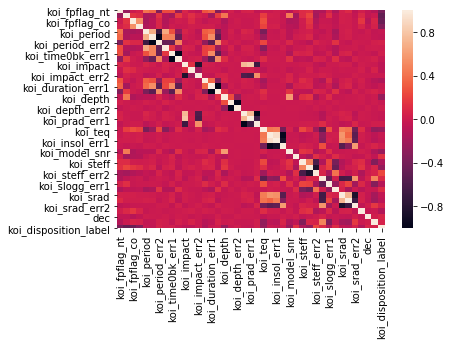

In [13]:
sn.heatmap(corrs)

In [19]:
abs(corrs["koi_disposition_label"]).sort_values(ascending=False)

koi_disposition_label    1.000000
koi_fpflag_ss            0.486481
koi_fpflag_co            0.452002
koi_fpflag_nt            0.380710
koi_fpflag_ec            0.339983
koi_steff_err1           0.254084
koi_depth                0.244109
koi_teq                  0.237782
koi_model_snr            0.233840
koi_steff_err2           0.232041
koi_tce_plnt_num         0.135711
koi_duration             0.134811
koi_steff                0.133363
ra                       0.117899
koi_slogg_err2           0.104482
koi_slogg                0.101181
koi_slogg_err1           0.099996
koi_srad_err1            0.077580
dec                      0.072855
koi_impact               0.067744
koi_impact_err1          0.065843
koi_kepmag               0.054859
koi_srad_err2            0.053862
koi_period_err2          0.047197
koi_period_err1          0.047197
koi_srad                 0.045170
koi_prad_err1            0.035515
koi_insol_err1           0.031934
koi_time0bk_err2         0.029161
koi_time0bk_er

In [57]:
features = list(corrs["koi_disposition_label"].loc[abs(corrs["koi_disposition_label"]) > .1].index)
features = features[0:len(features)-1]
features

['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_duration',
 'koi_depth',
 'koi_teq',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err2',
 'ra']

In [58]:
target_col = "koi_disposition_label"

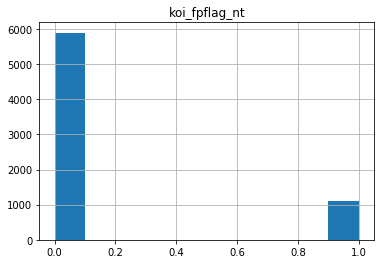

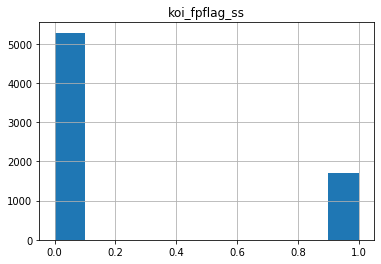

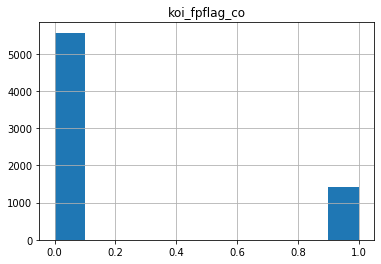

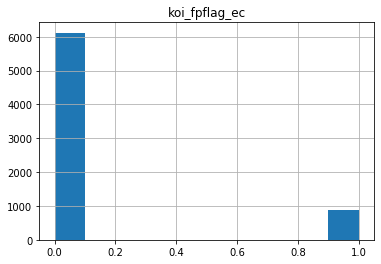

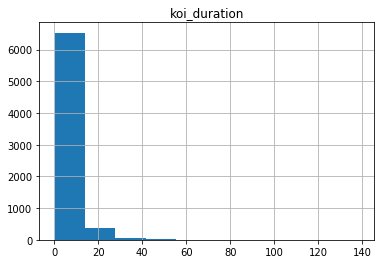

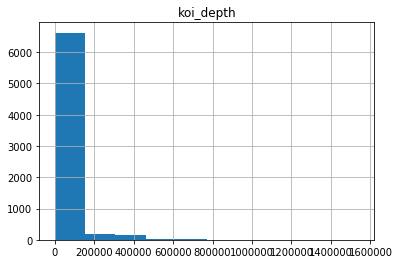

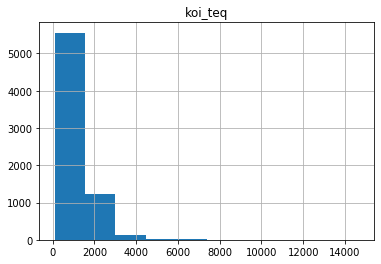

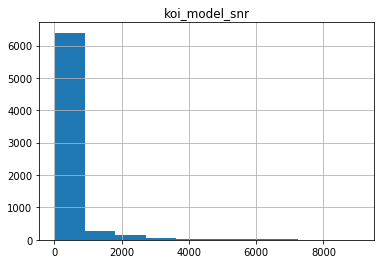

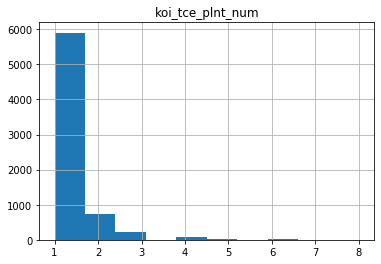

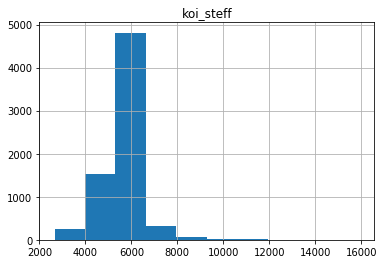

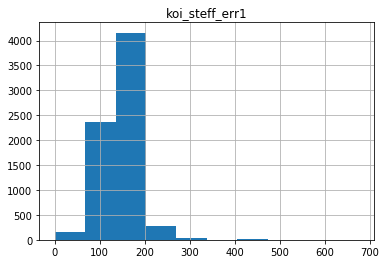

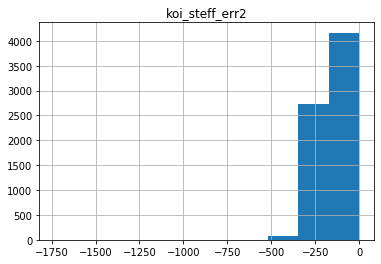

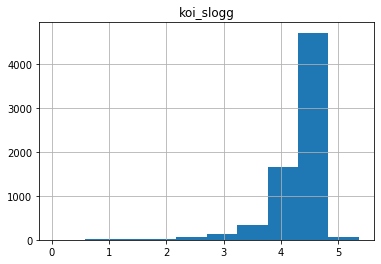

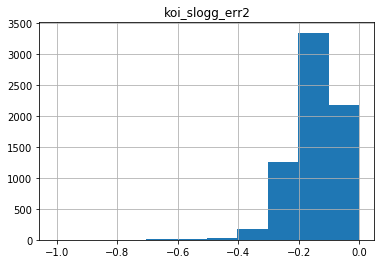

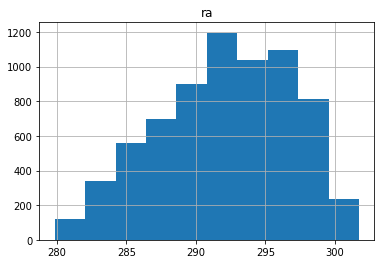

In [59]:
for col in features:
    df[[col]].hist()

In [60]:
#split the data
data = df[features]
target = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target, test_size=0.2) #stratify for unequal target weights

In [61]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
print(f"Training Rows: {len(y_train)}")
print(f"Testing Rows: {len(y_test)}")

Training Rows: 5592
Testing Rows: 1399


# Linear Models

Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.66      0.69      0.67       360
           2       0.65      0.59      0.62       338

    accuracy                           0.82      1399
   macro avg       0.76      0.76      0.76      1399
weighted avg       0.82      0.82      0.82      1399


Confusion Matrix:
[[698   0   3]
 [  5 250 105]
 [  7 131 200]]

ROC Curve:


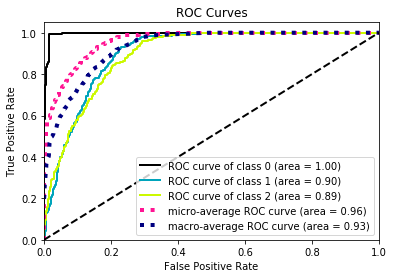

In [63]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

k: 1, Train/Test Score: 1.000/0.798
k: 3, Train/Test Score: 0.898/0.800
k: 5, Train/Test Score: 0.868/0.809
k: 7, Train/Test Score: 0.852/0.813
k: 9, Train/Test Score: 0.845/0.818
k: 11, Train/Test Score: 0.844/0.813
k: 13, Train/Test Score: 0.839/0.810
k: 15, Train/Test Score: 0.843/0.811
k: 17, Train/Test Score: 0.841/0.814
k: 19, Train/Test Score: 0.842/0.809


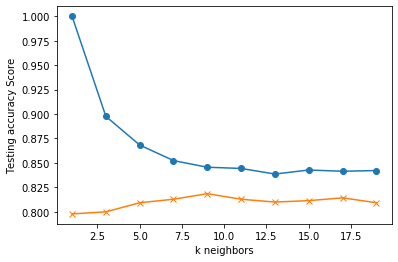

In [64]:
 train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.63      0.80      0.70       360
           2       0.70      0.47      0.56       338

    accuracy                           0.82      1399
   macro avg       0.77      0.75      0.75      1399
weighted avg       0.82      0.82      0.81      1399


Confusion Matrix:
[[696   3   2]
 [  6 287  67]
 [ 10 168 160]]

ROC Curve:


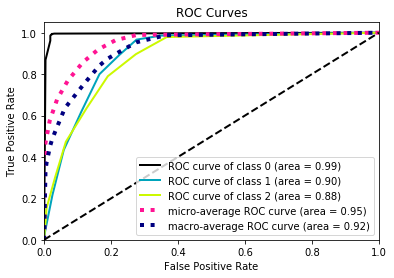

In [75]:
#KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

SVM Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.67      0.68      0.67       360
           2       0.65      0.62      0.63       338

    accuracy                           0.82      1399
   macro avg       0.77      0.76      0.77      1399
weighted avg       0.82      0.82      0.82      1399


Confusion Matrix:
[[698   0   3]
 [  6 246 108]
 [  7 123 208]]

ROC Curve:


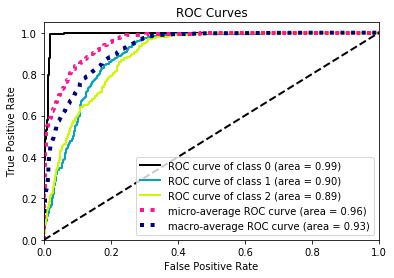

In [66]:
 #SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

# Ensemble/Tree Models

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       701
           1       0.75      0.71      0.73       360
           2       0.69      0.75      0.72       338

    accuracy                           0.85      1399
   macro avg       0.81      0.81      0.81      1399
weighted avg       0.85      0.85      0.85      1399


Confusion Matrix:
[[685   6  10]
 [  4 254 102]
 [  7  79 252]]

ROC Curve:


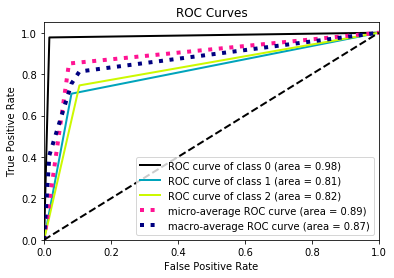

In [67]:
 #Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.76      0.80      0.78       360
           2       0.77      0.72      0.74       338

    accuracy                           0.88      1399
   macro avg       0.84      0.84      0.84      1399
weighted avg       0.88      0.88      0.88      1399


Confusion Matrix:
[[697   1   3]
 [  5 287  68]
 [  7  89 242]]

ROC Curve:


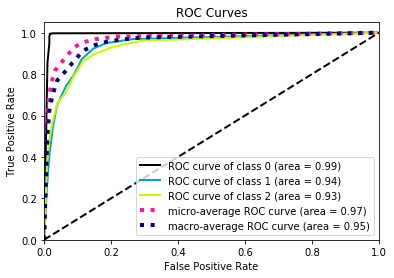

In [68]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.81      0.81      0.81       360
           2       0.80      0.77      0.78       338

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[698   0   3]
 [  5 293  62]
 [  9  69 260]]

ROC Curve:


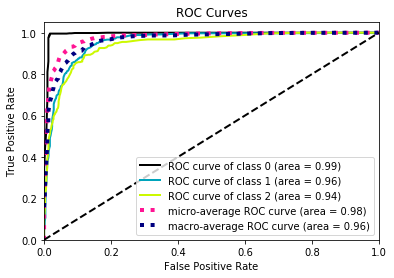

In [69]:
 #Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       701
           1       0.60      0.79      0.68       360
           2       0.75      0.66      0.70       338

    accuracy                           0.80      1399
   macro avg       0.78      0.78      0.77      1399
weighted avg       0.83      0.80      0.81      1399


Confusion Matrix:
[[616  83   2]
 [  4 285  71]
 [  7 108 223]]

ROC Curve:


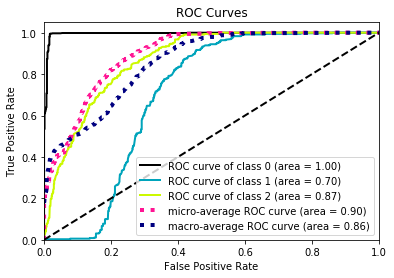

In [70]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.79      0.82      0.80       360
           2       0.80      0.75      0.77       338

    accuracy                           0.89      1399
   macro avg       0.86      0.85      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[697   0   4]
 [  6 294  60]
 [  7  77 254]]

ROC Curve:


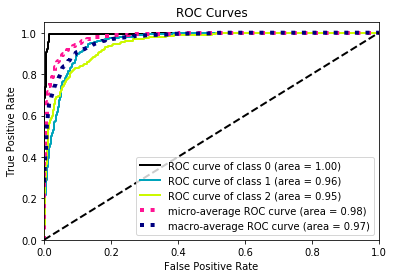

In [71]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.80      0.81      0.80       360
           2       0.79      0.77      0.78       338

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[697   1   3]
 [  4 290  66]
 [  7  71 260]]

ROC Curve:


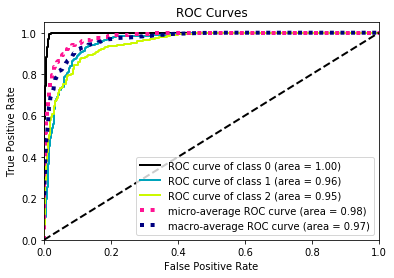

In [72]:
#XTREME Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [73]:
#Random Forest Feature Importances
sorted(list(zip(xgbc.feature_importances_, data.columns)))

[(0.004275965, 'koi_steff_err2'),
 (0.0044867606, 'koi_slogg_err2'),
 (0.0047972067, 'koi_steff'),
 (0.0049339933, 'ra'),
 (0.005750119, 'koi_depth'),
 (0.0057993326, 'koi_teq'),
 (0.006719483, 'koi_duration'),
 (0.0070788497, 'koi_slogg'),
 (0.011660523, 'koi_tce_plnt_num'),
 (0.019885741, 'koi_model_snr'),
 (0.02210336, 'koi_steff_err1'),
 (0.08060316, 'koi_fpflag_ec'),
 (0.2209418, 'koi_fpflag_ss'),
 (0.28059277, 'koi_fpflag_co'),
 (0.320371, 'koi_fpflag_nt')]

In [74]:
#Random Forest Feature Importances
sorted(list(zip(rfc.feature_importances_, data.columns)))

[(0.010980188902498147, 'koi_tce_plnt_num'),
 (0.032201291815300306, 'koi_steff'),
 (0.03342833801799558, 'ra'),
 (0.03511915815569808, 'koi_slogg_err2'),
 (0.040972149924655366, 'koi_slogg'),
 (0.04354345934785154, 'koi_fpflag_ec'),
 (0.04656183014865322, 'koi_duration'),
 (0.05829869640994665, 'koi_steff_err2'),
 (0.06324947347474534, 'koi_steff_err1'),
 (0.06592508501065816, 'koi_teq'),
 (0.0703167448465805, 'koi_depth'),
 (0.12006032682011726, 'koi_fpflag_ss'),
 (0.12300435072831073, 'koi_fpflag_co'),
 (0.126654185443498, 'koi_fpflag_nt'),
 (0.1296847209534912, 'koi_model_snr')]